We start with a worked example.

Given $\mathcal{N}(0, 1)$, we want to find the probability of a particular event. Let's plot the original distribution $p$:

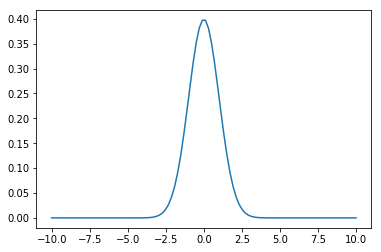

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

p = stats.norm(0, 1)

x = np.linspace(-10, 10, 100)
plt.plot(x, p.pdf(x));

Now, let's say we want to find the cumulative probability of P(X >= 3). We can visualize that with a vertical bar at X = 3:

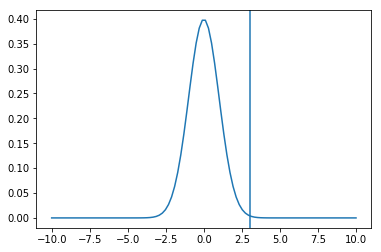

In [71]:
x = np.linspace(-10, 10, 100)
plt.axvline(x=3, ymin=0, ymax=1)
plt.plot(x, p.pdf(x));

Using (almost) exact computation, we can compute the true value:

In [72]:
h_true = 1 - p.cdf(3)
print(h_true)

0.00134989803163


Now, using Monte Carlo integration, we can approximate this integral:

In [73]:
n = 100
y = p.rvs(n)
h_mc = np.sum(y > 3) / n
# estimate and relative error
h_mc, np.abs(h_mc - h_true)/h_true

(0.0, 1.0)

Woops! That's the wrong result! Execute the above with enough samples to approximate the true value:

In [74]:
n = 1_000_000
y = p.rvs(n)
h_mc = np.sum(y > 3) / n
# estimate and relative error
h_mc, np.abs(h_mc - h_true)/h_true

(0.0013359999999999999, 0.010295615894276548)

We can see that in general it is onerous to sample from this random variable because we throw the majority of our samples away!

Qualitatively, how many samples do we throw away?

In [75]:
print(f"We throw away about {p.cdf(3)*n} or {p.cdf(3):.2%} of the samples with n = {n}")

We throw away about 998650.1019683699 or 99.87% of the samples with n = 1000000


Now let's use Importance Sampling.

Recall that the idea of importance sampling is to posit an approximating distribution $q$ to use instead of sampling from $p$. We then weight these samples to get a useful approximation.

For example, let's create an approximating distribution $q \sim \mathcal{U}(3, 5)$

Note that we picked the ranges of $q$ to have meaningful overlap in the area we care about.

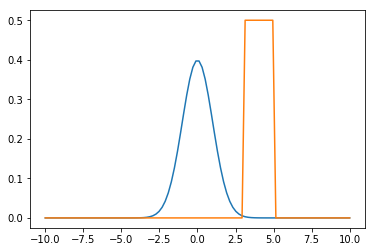

In [76]:
# visualize
x = np.linspace(-10, 10, 100)
plt.plot(x, p.pdf(x));
plt.plot(x, stats.uniform(3, 2).pdf(x));

See how the uniform distribution covers the area we are concerned with?

Now, let's compute with it.

First, we define $q$.

In [77]:
q = stats.uniform(3, 2)

Then, we sample from it and reweight according to the probabilities in $q$ and $p$:

In [78]:
n = 1000
samples = q.rvs(n)

w = p.pdf(samples) / q.pdf(samples)
h_is = np.sum(w) / n

# estimate and relative error
h_is, np.abs(h_is - h_true)/h_true

(0.0013251661072667949, 0.018321327821659947)

Now it's your turn.

Repeat the above experiment with one larger uniform distribution and one smaller uniform distribution. Show both the estimate and the error.

- Larger

In [131]:
n = 1_000_000
q = stats.uniform(3, 40) # Larger
samples = q.rvs(n)

w = p.pdf(samples) / q.pdf(samples)
h_is_larger_best = np.sum(w) / n

# estimate and relative error
h_is_larger_best, np.abs(h_is_larger_best - h_true)/h_true

(0.0013435717697031738, 0.0046864739252121274)

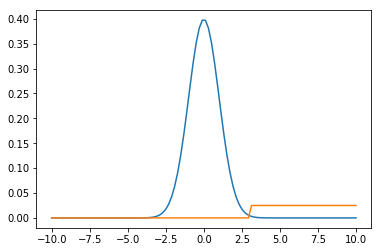

In [132]:
# visualize
x = np.linspace(-10, 10, 100)
plt.plot(x, p.pdf(x));
plt.plot(x, stats.uniform(3, 40).pdf(x));

- SMaller

In [96]:
n = 100_000

q = stats.uniform(3, 1) # Smaller
samples = q.rvs(n)

w = p.pdf(samples) / q.pdf(samples)
h_is_smaller = np.sum(w) / n

# estimate and relative error
h_is_smaller, np.abs(h_is_smaller - h_true)/h_true

(0.001315388082015555, 0.025564856608372967)

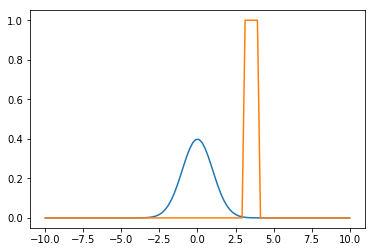

In [92]:
# visualize
x = np.linspace(-10, 10, 100)
plt.plot(x, p.pdf(x));
plt.plot(x, stats.uniform(3, 1).pdf(x));

In [109]:
print(f"The difference between the larger uniform and the smaller uniform is {h_is_larger - (h_is_smaller )}")

The difference between the larger uniform and the smaller uniform is 3.9682470026336514e-05


Repeat the above experiment using a standard normal distribution to approximate the uniform distribution over the following intervals: [-3, 3], [-2, 2], [-1, 1].

In [84]:
 stats.uniform(-3,6).cdf(-3)

0.0

# Uniform -3,3

In [124]:
h_true_last  = stats.uniform(-3,6).cdf(3) -  stats.uniform(-3,6).cdf(-3)
n_last = 1_000_000
q_last = stats.norm() 
p_last = stats.uniform(-3,6)
samples_last = q_last.rvs(n_last)

w_last = p_last.pdf(samples_last) / q_last.pdf(samples_last)
h_is_larger_last = np.sum(w_last) / n_last

# estimate and relative error
h_is_larger_last, np.abs(h_is_larger_last - h_true_last)/h_true_last

(1.0005386842074364, 0.00053868420743641288)

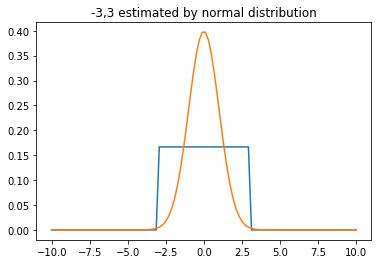

In [125]:
x = np.linspace(-10, 10, 100)
plt.plot(x, p_last.pdf(x));
plt.plot(x, stats.norm().pdf(x))
plt.title("-3,3 estimated by normal distribution");

# Uniform -2,2

In [126]:
h_true_last  = stats.uniform(-2,4).cdf(2) -  stats.uniform(-2,4).cdf(-2)
n_last = 1_000_000
q_last = stats.norm() 
p_last = stats.uniform(-2,4)
samples_last = q_last.rvs(n_last)

w_last = p_last.pdf(samples_last) / q_last.pdf(samples_last)
h_is_larger_last = np.sum(w_last) / n_last

# estimate and relative error
h_is_larger_last, np.abs(h_is_larger_last - h_true_last)/h_true_last

(1.0005316165298956, 0.0005316165298956399)

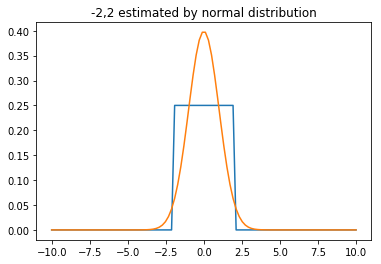

In [127]:
x = np.linspace(-10, 10, 100)
plt.plot(x, p_last.pdf(x));
plt.plot(x, stats.norm().pdf(x))
plt.title("-2,2 estimated by normal distribution");

# Uniform -1,1

In [128]:
h_true_last  = stats.uniform(-1,2).cdf(2) -  stats.uniform(-1,2).cdf(-2)
n_last = 1_000_000
q_last = stats.norm() 
p_last = stats.uniform(-1,2)
samples_last = q_last.rvs(n_last)

w_last = p_last.pdf(samples_last) / q_last.pdf(samples_last)
h_is_larger_last = np.sum(w_last) / n_last

# estimate and relative error
h_is_larger_last, np.abs(h_is_larger_last - h_true_last)/h_true_last

(0.99822752654696434, 0.0017724734530356612)

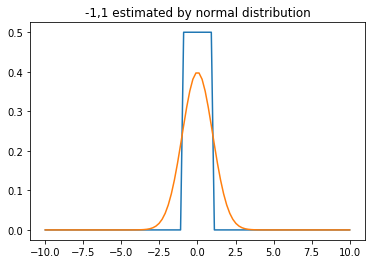

In [129]:
x = np.linspace(-10, 10, 100)
plt.plot(x, p_last.pdf(x));
plt.plot(x, stats.norm().pdf(x))
plt.title("-1,1 estimated by normal distribution");

Can you offer any rules of thumb to choose $q$?

In [130]:
print(f'The best error from a uniform approximating a normal is {np.abs(h_is_larger_best - h_true)/h_true} while the best error from a normal approximating a \
      uniform is {np.abs(h_is_larger_last - h_true_last)/h_true_last}')

The best error from a uniform approximating a normal is 0.0029154861623067025 while the best error from a normal approximating a       uniform is 0.0017724734530356612


-  In general, you should pick a distribution that completely covers the area of interest.